# Progetto HR DATA MINING 2017/2018

In [4]:
import pandas as ps
import numpy as np

In [5]:
hr = ps.read_csv('HR_comma_sep.csv')

## Informazioni sulle colonne, tipo dato

In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


satisfaction_level: livello di soddisfazione (da 1 a 0) valore                          float

last_evaluation: Time since last performance evaluation (in Years)                      float

number_project: Number of projects completed while at work                              int

average_montly_hours: Average monthly hours at workplace                                int

time_spend_company: Number of years spent in the company                                int

Work_accident: Whether the employee had a workplace accident                            int

left: Whether the employee left the workplace or not (1 or 0) Factor                    int

promotion_last_5years: Whether the employee was promoted in the last five years         int

sales: Department in which they work for                                                object

salary: Relative level of salary (high)                                                 object

In [7]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Controllo nel database se non ci siano valori nulli

is null().any().any() è una funzione della libreria di pandas e restituisce True se ci sono valori nulli , False altrimenti

In [8]:
hr.isnull().any().any()

False

# Exploration Analysis

## Quante persone sono rimaste e quante se ne sono andate nell'ultimo anno?

In [9]:
hr_left_inorout = ps.DataFrame( hr.left.value_counts() )

In [10]:
hr_left_inorout

,left
0,11428
1,3571


## Quante persone ci sono in ciascun dipartimento?

In [11]:
hr_sales = ps.DataFrame( hr.sales.value_counts() )

In [12]:
hr_sales

,sales
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739
management,630


sales non mi è molto chiaro se sia una cosa normale o meno.

## Quante persone sono state promosse negli ultimi cinque anni?

In [13]:
hr_promotion_last_5years = ps.DataFrame ( hr.promotion_last_5years.value_counts() )

In [14]:
hr_promotion_last_5years

,promotion_last_5years
0,14680
1,319


## Quanti impiegati hanno avuto un incidente? 

In [15]:
hr_work_accident = ps.DataFrame( hr.Work_accident.value_counts() )

In [16]:
hr_work_accident

,Work_accident
0,12830
1,2169


## Quanti impiegati per settore?

In [17]:
hr_sales = ps.DataFrame( hr.sales.value_counts() )

In [18]:
hr_sales

,sales
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739
management,630


In [19]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

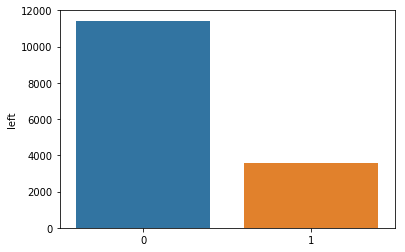

In [20]:
sn.barplot( hr_left_inorout.index, hr_left_inorout.left )

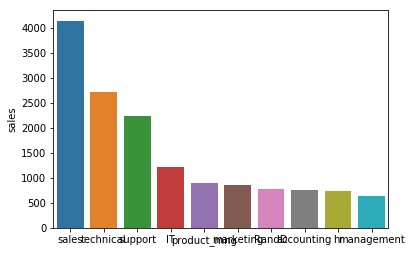

In [21]:
sn.barplot( hr_sales.index, hr_sales.sales )

In [22]:
lista = list(set(hr.sales))

In [23]:
lista

['management',
 'product_mng',
 'hr',
 'marketing',
 'support',
 'sales',
 'RandD',
 'IT',
 'technical',
 'accounting']

## Quanti infortuni per settore

con factorplox 

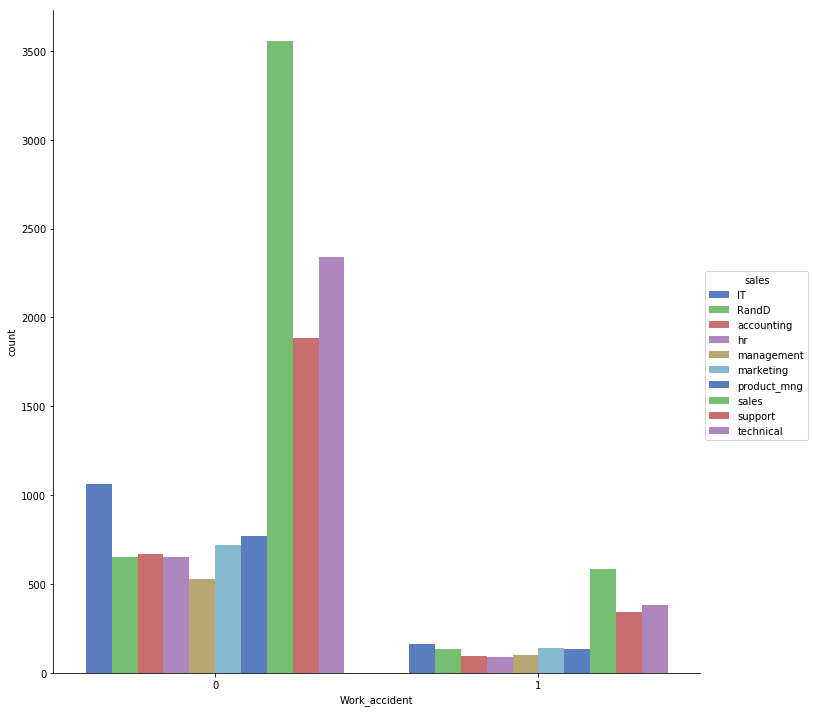

In [25]:
work_accident_sales_count = hr[['Work_accident', 'sales']].groupby(['Work_accident', 'sales']).size().reset_index()
work_accident_sales_count.columns = ['Work_accident', 'sales', 'count']

sn.factorplot(x="Work_accident", y = 'count', hue="sales", data=work_accident_sales_count,
               size=10, kind="bar", palette="muted")

### conteggio valori

In [33]:
work_accident_sales_count = hr[['Work_accident', 'sales']].groupby(['Work_accident', 'sales']).size()

In [34]:
work_accident_sales_count

Work_accident  sales      
0              IT             1063
               RandD           653
               accounting      671
               hr              650
               management      527
               marketing       720
               product_mng     770
               sales          3553
               support        1884
               technical      2339
1              IT              164
               RandD           134
               accounting       96
               hr               89
               management      103
               marketing       138
               product_mng     132
               sales           587
               support         345
               technical       381
dtype: int64

## Quanti persone infortunate sono rimaste e quante se ne sono andate?

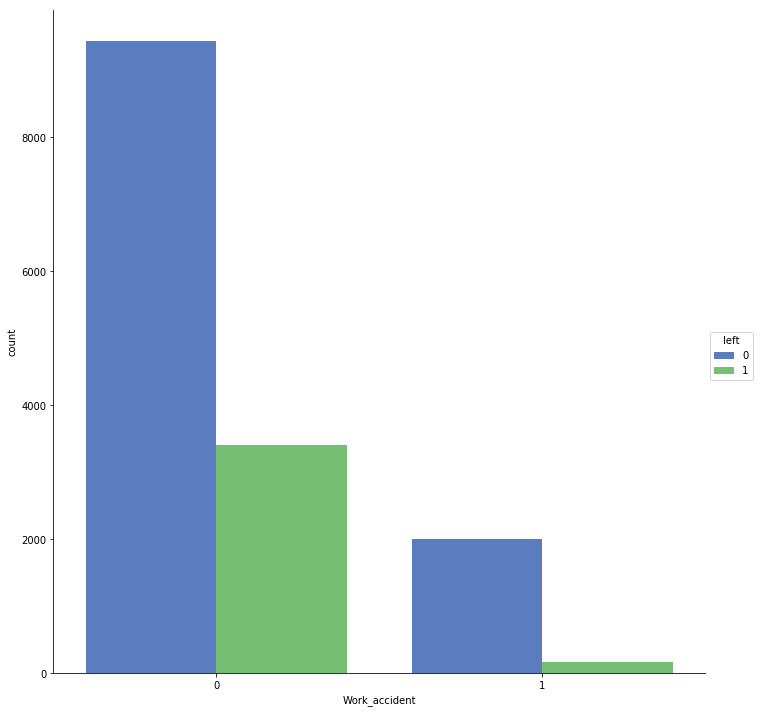

In [26]:
work_accident_left_count = hr[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size().reset_index()
work_accident_left_count.columns = ['Work_accident', 'left', 'count']

sn.factorplot(x="Work_accident", y = 'count', hue="left", data=work_accident_left_count,
               size=10, kind="bar", palette="muted")

### conteggio quanti sono rimasti e quanti se ne sono andati in base agli infortuni

In [28]:
work_accident_left_count = hr[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size()

In [29]:
work_accident_left_count

Work_accident  left
0              0       9428
               1       3402
1              0       2000
               1        169
dtype: int64